[ 0.24957086  0.27604833  0.30361763]
[ 0.29584486  0.32369762  0.35240993]
0.008830000000000005
We are 99.117% sure that the experiment in better than the control


[Text(0,0.5,'CDF'), Text(0.5,0,'Experiment / Control')]

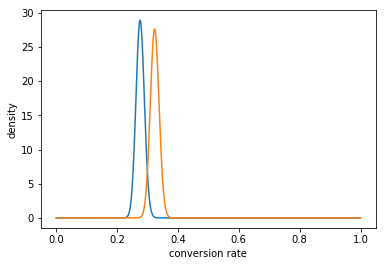

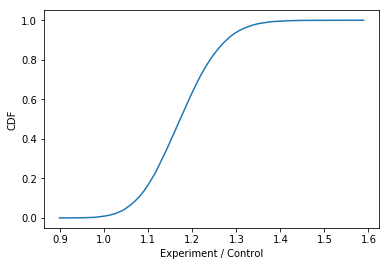

In [2]:
from scipy.stats import beta
from scipy.stats import beta
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

total_entries = 1000

# Our Priors
# Take alpha = 15 and beta = 35 corresponding to (30/100) conversion rate
prior_successes = 15
prior_failures = 35

c_successes = 275
e_successes = 325

c_failures = total_entries - c_successes
e_failures = total_entries - e_successes

# For our graph
fig, ax = plt.subplots(1, 1) 

# Control
c_alpha, c_beta = c_successes + prior_successes, c_failures + prior_failures
# Experiment
e_alpha, e_beta = e_successes + prior_successes, e_failures + prior_failures

x = np.linspace(0., 1, 1000) 

# Generate and plot the distributions!
c_distribution = beta(c_alpha, c_beta)
e_distribution = beta(e_alpha, e_beta)

ax.plot(x, c_distribution.pdf(x))
ax.plot(x, e_distribution.pdf(x))

ax.set(xlabel='conversion rate', ylabel='density')

print(c_distribution.ppf([0.025, 0.5, 0.975]))
print(e_distribution.ppf([0.025, 0.5, 0.975]))


sample_size = 100000

c_samples = pd.Series([c_distribution.rvs() for _ in range(sample_size)])
e_samples = pd.Series([e_distribution.rvs() for _ in range(sample_size)])

p_value_equivalent = 1.0 - sum(e_samples > c_samples)/sample_size
# should be less than 0.05 for signifance
print (p_value_equivalent)

print ('We are ' + repr(100 - p_value_equivalent*100) + '% sure that the experiment in better than the control')

fig, ax = plt.subplots(1, 1)

ser = pd.Series(e_samples/c_samples)

# Make the CDF
ser = ser.sort_values()
ser[len(ser)] = ser.iloc[-1] 
cum_dist = np.linspace(0., 1., len(ser))
ser_cdf = pd.Series(cum_dist, index=ser)

ax.plot(ser_cdf)
ax.set(xlabel='Experiment / Control', ylabel='CDF')